<img src="https://pa-legg.github.io/images/uwe_banner.png">

# UFCFFY-15-M Cyber Security Analytics 23-24

## Portfolio Assignment: Worksheet 1
## Investigate a web server application logs to identify malicious attack activity using Python data science libraries
---

For this task, the company **"UWEtech"** have enlisted your support as a security data analyst. They suspect some kind of attack on their web server application, however they are unable to diagnose what has happened exactly, or which of their users have caused the attack. The company have provided you with their recent log data records. You will need to complete a series of tasks to examine the data further, and then expand your investigation to uncover any malicious activity.

**Dataset**: You will be randomly issued a **unique dataset** based on your UWE username - **failure to use the dataset assigned to your username will result in a zero grade**. Please see the folder ***"Portfolio Assignment"*** under the Assignment tab on Blackboard for further detail related to the access and download of the necessary dataset.

### Assessment and Marking
---
The completion of this worksheet is worth **20%** of your portfolio assignment for the UFCFFY-15-M Cyber Security Analytics (CSA) module. Each question states the possible marks available for a correct answer. Where a question is worth more than 1 mark, a partial solution to the question may warrant partial marks.

### Submission Documents
---

Your submission for this task should include:

- **1 Jupyter Notebook file (*.ipynb)** 

You should complete your work using the ipynb file provided (i.e., this document). Once you have completed your work, you should ensure that all code cells have been executed and then you should save your notebook. **Please note: Staff will NOT execute your notebook during marking. It is your responsibility to ensure that your saved notebook shows the code cell outputs as required.**

The deadline for your portfolio submission is **THURSDAY 2ND MAY @ 14:00**. This assignment is eligible for the [48-hour late submission window](https://www.uwe.ac.uk/study/academic-information/personal-circumstances/late-submission-window), however module staff will not be able to assist with any queries after the deadline.

Your portfolio submitted to Blackboard must contain 3 independent documents:

- ***STUDENT_ID-TASK1.ipynb*** (your iPYNB with all cells executed)
- ***STUDENT_ID-TASK2.ipynb*** (your iPYNB with all cells executed)
- ***STUDENT_ID-TASK3.pdf*** (a PDF report of your research investigation)

### Contact
---

Questions about this assignment should be directed to your module leader (Phil.Legg@uwe.ac.uk). You should use the [online Q&A form](https://forms.office.com/e/yxFJZDraRG) to ask questions related to this module and this assignment, as well as utilising the on-site teaching sessions.

---

# Student ID: 23008852

- **By submitting this assignment to Blackboard as part of your portfolio, I declare that the submission is my own work.**

***

In [1]:
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
import pandas as pd
import numpy as np
import networkx as nx
import seaborn as sns
pd.set_option('display.max_rows', 20)

In the cell below, you will need to change `data_file` to your own specific data filename. The example data file is purely to demonstrate some initial steps for your investigation and should not be used.

In [2]:
data_file = './y232-wang_2024jan_dataset.txt'

In [3]:
# Load in the data set as required
data = pd.read_csv(data_file, sep=r'\s+')
# original
# data = pd.read_csv(data_file, delim_whitespace=True)
temp_df = data[data.columns[:-1]]
temp_df.columns = data.columns[1:]
data = temp_df
data['datetime'] = pd.to_datetime(data['date'] + " " + data['time'])
data

,date,time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken,datetime
0,2023-01-01,00:24:00,167.167.244.11,GET,gtbmiuyo.css,-,443,-,34.189.170.188,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+11_4_1+like...,-,200,0,0,27,2023-01-01 00:24:00
1,2023-01-01,00:24:00,167.167.244.11,GET,index.aspx,-,443,-,34.189.170.188,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+11_4_1+like...,-,200,0,0,22,2023-01-01 00:24:00
2,2023-01-01,00:24:28,167.167.244.11,GET,favico.ico,-,443,-,34.189.170.188,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+11_4_1+like...,https://uwetech.co.uk/index.aspx,200,0,0,23,2023-01-01 00:24:28
3,2023-01-01,00:24:28,167.167.244.11,GET,gcjnjeej.css,-,443,-,34.189.170.188,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+11_4_1+like...,https://uwetech.co.uk/index.aspx,404,0,0,23,2023-01-01 00:24:28
4,2023-01-01,00:24:28,167.167.244.11,GET,main.css,-,443,-,34.189.170.188,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+11_4_1+like...,https://uwetech.co.uk/index.aspx,200,0,0,29,2023-01-01 00:24:28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350591,2023-01-30,23:55:45,167.167.244.11,GET,transactions.aspx,page=1,443,um821644,45.94.33.238,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,https://uwetech.co.uk/transactions.aspx,200,0,0,24,2023-01-30 23:55:45
350592,2023-01-30,23:56:06,167.167.244.11,GET,footer.css,-,443,-,45.94.33.238,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,https://uwetech.co.uk/transactions.aspx,200,0,0,22,2023-01-30 23:56:06
350593,2023-01-30,23:56:06,167.167.244.11,GET,ttcsdmrb.js,v=746817,443,-,45.94.33.238,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,https://uwetech.co.uk/transactions.aspx,200,0,0,20,2023-01-30 23:56:06
350594,2023-01-30,23:56:06,167.167.244.11,GET,phekuflm.css,-,443,-,45.94.33.238,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,https://uwetech.co.uk/transactions.aspx,404,0,0,22,2023-01-30 23:56:06


### Question 1: Show how often each of the unique machines (defined by client IP address 'c-ip') have accessed this web server application? (1 Mark)

*Hint: Think about how you would count the occurrence of all possible values within a Dataframe column.*

In [4]:
# Q1 ANSWER
# Count the unique client IP addresses and print the outputs in order
def factor_col(col):
    factor = pd.Categorical(col)
    return pd.Series(factor).value_counts(sort=False)

df = pd.DataFrame(data['c-ip'])

# count the numbers of each client IP address by following the original order in the array

f_cip = pd.DataFrame(factor_col(df['c-ip']))

# c-ips are sorted in a desending order
sort_f_cip = f_cip.sort_values('count', ascending=False)
sort_f_cip

,count
198.169.194.238,332
89.43.49.3,280
135.244.31.76,272
194.245.32.53,221
94.177.126.101,155
...,...
45.85.127.121,20
185.184.115.39,20
195.82.125.220,19
45.95.10.120,19


### Question 2: Show how often each of the possible unique URLs (defined by 'cs(Referer)') have been accessed within the dataset? (1 Mark)

*Hint: Think about how you would count the occurrence of all possible values within a Dataframe column.*

In [5]:

# Q2 ANSWER
# Count the possible unique URLs 'cs(Referer)'
def factor_col(col):
    factor = pd.Categorical(col)
    return pd.Series(factor).value_counts(sort=False)
    
# Count the numbers of the possible unique URLs 'cs(Referer)'
# Including '-'
df = pd.DataFrame(data['cs(Referer)'])
cre_ct = factor_col(df['cs(Referer)'])

# Remove '-' URLs

rrt_df = data[data['cs(Referer)'] != "-"]

# Count the numbers of the possible unique URLs 'cs(Referer)'
# Without '-'
cre = rrt_df['cs(Referer)']
cre_ct_02 = pd.Series(cre).value_counts()
pd.DataFrame(cre_ct_02)

,count
cs(Referer),
https://uwetech.co.uk/transactions.aspx,117177
https://uwetech.co.uk/index.aspx,90058
https://uwetech.co.uk/login.aspx,66459
https://uwetech.co.uk/account_status.aspx,31088
https://uwetech.co.uk/transfer.aspx,8782
https://uwetech.co.uk/changepassword.aspx,3127
https://uwetech.co.uk/faq.aspx,1844
https://uwetech.co.uk/transfer_complete.aspx,1496
https://uwetech.co.uk/change_avatar.aspx,610


### Question 3: Show how often each client IP has accessed each URL? (1 Mark)

*Hint: Think about how you would count the occurrence of all possible pairs of values within multiple Dataframe columns.*

In [6]:
# Q3 ANSWER
# all '-' in URLs are removed in rrt_df 
xtab = pd.crosstab(rrt_df['c-ip'], rrt_df['cs(Referer)'])
xtab

cs(Referer),https://uwetech.co.uk/account_status.aspx,https://uwetech.co.uk/change_avatar.aspx,https://uwetech.co.uk/changepassword.aspx,https://uwetech.co.uk/faq.aspx,https://uwetech.co.uk/index.aspx,https://uwetech.co.uk/login.aspx,https://uwetech.co.uk/transactions.aspx,https://uwetech.co.uk/transfer.aspx,https://uwetech.co.uk/transfer_complete.aspx
c-ip,,,,,,,,,
101.167.223.24,4,0,0,0,14,9,31,4,0
102.129.155.160,2,0,7,0,11,7,8,0,0
102.129.64.24,7,0,0,0,16,18,18,0,0
102.132.118.223,7,0,0,0,19,12,24,0,0
102.165.17.153,4,0,0,0,7,7,9,0,0
...,...,...,...,...,...,...,...,...,...
95.87.102.7,2,0,0,0,9,7,17,6,0
96.6.242.135,6,0,6,0,19,11,22,0,0
99.82.169.124,7,0,0,0,19,14,23,0,0


### Question 4: Filter the data to show all rows where 'cs-uri-query' starts with the string 'v='. (1 Mark)

In [7]:
# Q4 ANSWER

# Extract all rows where 'cs-uri-query' starts with the string 'v='
df = pd.DataFrame(data)

df['cuq'] = df['cs-uri-query']
df['cuq'] = df['cuq'].str.contains('v=', regex=True)
df[df['cuq'] == True ]


,date,time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken,datetime,cuq
7,2023-01-01,00:24:46,167.167.244.11,GET,template.css,v=vbdhwsnk,443,-,34.189.170.188,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+11_4_1+like...,https://uwetech.co.uk/index.aspx,200,0,0,21,2023-01-01 00:24:46,True
21,2023-01-01,00:26:26,167.167.244.11,GET,cvppenru.js,v=385746,443,dd915907,34.189.170.188,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+11_4_1+like...,https://uwetech.co.uk/transactions.aspx,200,0,0,23,2023-01-01 00:26:26,True
24,2023-01-01,00:26:50,167.167.244.11,GET,aucmigtu.js,v=529178,443,dd915907,34.189.170.188,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+11_4_1+like...,https://uwetech.co.uk/transactions.aspx,200,0,0,30,2023-01-01 00:26:50,True
30,2023-01-01,00:27:25,167.167.244.11,GET,btnjzjas.js,v=389361,443,dd915907,34.189.170.188,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+11_4_1+like...,https://uwetech.co.uk/transactions.aspx,200,0,0,26,2023-01-01 00:27:25,True
32,2023-01-01,00:27:25,167.167.244.11,GET,template.css,v=cdpginre,443,dd915907,34.189.170.188,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+11_4_1+like...,https://uwetech.co.uk/transactions.aspx,200,0,0,24,2023-01-01 00:27:25,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350551,2023-01-30,23:36:04,167.167.244.11,GET,template.css,v=ninqvvzh,443,ec212315,212.221.91.206,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://uwetech.co.uk/account_status.aspx,200,0,0,23,2023-01-30 23:36:04,True
350556,2023-01-30,23:36:30,167.167.244.11,GET,iapbjxvb.js,v=920035,443,ec212315,212.221.91.206,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://uwetech.co.uk/transactions.aspx,200,0,0,29,2023-01-30 23:36:30,True
350559,2023-01-30,23:36:42,167.167.244.11,GET,gpqoymli.js,v=813268,443,ec212315,212.221.91.206,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://uwetech.co.uk/transactions.aspx,200,0,0,23,2023-01-30 23:36:42,True
350573,2023-01-30,23:54:34,167.167.244.11,GET,template.css,v=usxjtpda,443,-,45.94.33.238,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,https://uwetech.co.uk/index.aspx,200,0,0,23,2023-01-30 23:54:34,True


### Question 5: Filter the data to show all rows where 'cs(User-Agent)' contain the string 'Win64? (1 Mark)

In [8]:
# Q5 ANSWER
df = pd.DataFrame(data)
# Extract all rows where 'cs(User-Agent)' contain the string 'Win64'
df['cua'] = df['cs(User-Agent)']
df['cua_win64'] = df['cua'].str.contains('Win64', regex=True )
df[df['cua_win64'] == True ]

,date,time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken,datetime,cua,cua_win64
41,2023-01-01,01:50:00,167.167.244.11,GET,favico.ico,-,443,-,40.96.45.69,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,-,200,0,0,27,2023-01-01 01:50:00,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,True
42,2023-01-01,01:50:00,167.167.244.11,GET,index.aspx,-,443,-,40.96.45.69,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,-,200,0,0,21,2023-01-01 01:50:00,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,True
43,2023-01-01,01:50:05,167.167.244.11,GET,footer.css,-,443,-,40.96.45.69,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://uwetech.co.uk/index.aspx,200,0,0,20,2023-01-01 01:50:05,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,True
44,2023-01-01,01:50:05,167.167.244.11,GET,index.aspx,-,443,-,40.96.45.69,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://uwetech.co.uk/index.aspx,200,0,0,26,2023-01-01 01:50:05,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,True
45,2023-01-01,01:50:21,167.167.244.11,GET,footer.css,-,443,-,40.96.45.69,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://uwetech.co.uk/index.aspx,200,0,0,24,2023-01-01 01:50:21,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350563,2023-01-30,23:37:02,167.167.244.11,GET,cpthgxry.css,-,443,ec212315,212.221.91.206,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://uwetech.co.uk/transactions.aspx,404,0,0,27,2023-01-30 23:37:02,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,True
350564,2023-01-30,23:37:02,167.167.244.11,GET,transactions.aspx,page=5,443,ec212315,212.221.91.206,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://uwetech.co.uk/transactions.aspx,200,0,0,25,2023-01-30 23:37:02,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,True
350565,2023-01-30,23:37:20,167.167.244.11,GET,favico.ico,-,443,-,212.221.91.206,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://uwetech.co.uk/transactions.aspx,200,0,0,25,2023-01-30 23:37:20,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,True
350566,2023-01-30,23:37:20,167.167.244.11,GET,main.css,-,443,-,212.221.91.206,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,https://uwetech.co.uk/transactions.aspx,200,0,0,21,2023-01-30 23:37:20,Mozilla/5.0+(Windows+NT+10.0;+Win64;+x64)+Appl...,True


### Question 6: Filter the data to show all rows where 'sc-status' is equal to 404, before 07:00AM? (1 Mark)

In [9]:
# Q6 ANSWER
# Extract all rows where 'sc-status' is equal to 404, before 07:00AM
df = pd.DataFrame(data)
ss_df = df[(df['sc-status'] == 404) & (pd.to_datetime(df['time']) < pd.to_datetime('07:00:00')) ]
ss_df

C:\Users\lesmo\AppData\Local\Temp\ipykernel_2720\3236956486.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ss_df = df[(df['sc-status'] == 404) & (pd.to_datetime(df['time']) < pd.to_datetime('07:00:00')) ]


,date,time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken,datetime
3,2023-01-01,00:24:28,167.167.244.11,GET,gcjnjeej.css,-,443,-,34.189.170.188,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+11_4_1+like...,https://uwetech.co.uk/index.aspx,404,0,0,23,2023-01-01 00:24:28
6,2023-01-01,00:24:46,167.167.244.11,GET,xbiklmrm.css,-,443,-,34.189.170.188,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+11_4_1+like...,https://uwetech.co.uk/index.aspx,404,0,0,28,2023-01-01 00:24:46
18,2023-01-01,00:25:57,167.167.244.11,GET,wwypwlwh.css,-,443,dd915907,34.189.170.188,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+11_4_1+like...,https://uwetech.co.uk/account_status.aspx,404,0,0,23,2023-01-01 00:25:57
27,2023-01-01,00:27:20,167.167.244.11,GET,haewjbil.css,-,443,dd915907,34.189.170.188,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+11_4_1+like...,https://uwetech.co.uk/transactions.aspx,404,0,0,29,2023-01-01 00:27:20
38,2023-01-01,00:28:05,167.167.244.11,GET,uqyxxljj.css,-,443,dd915907,34.189.170.188,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+11_4_1+like...,https://uwetech.co.uk/transactions.aspx,404,0,0,23,2023-01-01 00:28:05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339290,2023-01-30,06:41:00,167.167.244.11,GET,erketzjl.css,-,443,-,212.161.102.129,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+14_1+like+M...,-,404,0,0,24,2023-01-30 06:41:00
339302,2023-01-30,06:41:58,167.167.244.11,GET,ehozajkz.css,-,443,-,212.161.102.129,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+14_1+like+M...,https://uwetech.co.uk/index.aspx,404,0,0,25,2023-01-30 06:41:58
339313,2023-01-30,06:43:05,167.167.244.11,GET,hyydbllh.css,-,443,zh670520,212.161.102.129,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+14_1+like+M...,https://uwetech.co.uk/transactions.aspx,404,0,0,29,2023-01-30 06:43:05
339315,2023-01-30,06:43:17,167.167.244.11,GET,pzdkusmj.css,-,443,zh670520,212.161.102.129,Mozilla/5.0+(iPhone;+CPU+iPhone+OS+14_1+like+M...,https://uwetech.co.uk/transactions.aspx,404,0,0,26,2023-01-30 06:43:17


### Question 7: Plot a Bar Chart showing the number of entries for each value in 'sc-status'. (1 Mark)

*Hint: Matplotlib and Pandas are closely linked - some pandas functions have matplotlib functions embedded. Read the documentation for more detail.*


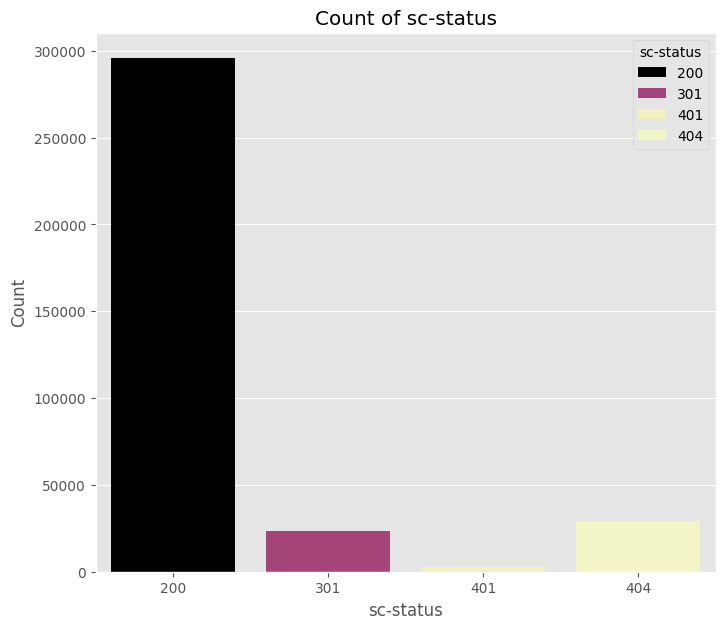

In [10]:
# Q7 ANSWER

plt.figure(figsize=(8,7))
sns.countplot(x='sc-status',data=data, hue='sc-status', palette='magma')
plt.title('Count of sc-status')  # Add title
plt.xlabel('sc-status')
plt.ylabel('Count')
plt.show()

### Question 8: Plot a line chart that shows the number of records (Y-axis) vs each day within the dataset (X-axis). (1 Mark)

In [11]:
da=da_ct.to_dict()
da

NameError: name 'da_ct' is not defined

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the dictionary 'da' into a DataFrame
dff = pd.DataFrame(list(da.items()), columns=['Date', 'Value'])

# Set the 'Date' column as datetime type
dff['Date'] = pd.to_datetime(dff['Date'])

# Create line plot using seaborn
plt.figure(figsize=(14, 6)) 
sns.lineplot(x='Date', y='Value', data=dff, marker='o')
plt.title('Each day within the dataset ')
plt.xlabel('Date')
plt.ylabel('Number of records')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

### (Advanced) Question 9: Filter and Plot a Network graph using the NetworkX library based on the criteria below (4 Marks)

* Filter the data to only the 20 most active IP addresses and plot this using a Network chart **(1 Mark)**.
* (Advanced) Scale each client node within the chart based on the amount of activity **(3 Marks)**.

In [ ]:
# Q9 ANSWER
# Count the numbers
def factor_col(col):
    factor = pd.Categorical(col)
    return pd.Series(factor).value_counts(sort=False)
    
# ----------------------------------------------------------------------------------------------------------
# Q9.1 Filter the data to only the 20 most active IP addresses and plot this using a Network chart (1 Mark).
# ----------------------------------------------------------------------------------------------------------

df = pd.DataFrame(data['c-ip'])

# count the numbers of each client IP address by following the original order in the array
f_cip = pd.DataFrame(factor_col(df['c-ip']))

s_cip = data['s-ip'].unique()
s_cip


In [ ]:
s_cip = {cip: 1 for cip in s_cip}
s_cip

In [ ]:
# c-ips are sorted in a desending order
sort_f_cip = f_cip.sort_values('count', ascending=False)


# Top 20 Active IPs, sorted in descending order
net_ip = sort_f_cip[:20]
graph_dict = net_ip.to_dict()
node_data = graph_dict['count']
node_data

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt


# Create a NetworkX graph
G = nx.Graph()

# Add nodes to the graph and set node sizes based on counts
for node, count in node_data.items():
    G.add_node(node, count=count)

# Add s_cip node(s)
for cip in s_cip:
    G.add_node(cip)

# Connect each node in node_data to s_cip node(s)
for node in node_data.keys():
    for cip in s_cip:
        G.add_edge(node, cip)

# Draw the network chart
nx.draw(G, with_labels=True, labels={node: f"{node}\nCount: {count}" for node, count in node_data.items()}, 
        node_color='skyblue', node_size=500, font_size=6, edge_color='gray')

plt.title("Network Chart with Connections to s_ip")
plt.show()

In [ ]:

# Create a NetworkX graph
G = nx.Graph()

# Add nodes to the graph and set node sizes based on counts
for node, count in node_data.items():
    # Adjust the size based on count
    G.add_node(node, count=count, size=count * 10) 

# Add s_cip node(s)
for cip, size in s_cip.items():
    G.add_node(cip, size=size)

# Connect each node in node_data to s_cip node(s)
for node in node_data.keys():
    for cip in s_cip.keys():
        G.add_edge(node, cip)

# Draw the network chart
nx.draw(G, with_labels=True, labels={node: f"{node}\nCount: {node_data[node]}" if node in node_data else f"{node}\nCount: 0" for node in G.nodes()}, 
        node_color='coral', node_size=[G.nodes[node].get('size', 100) for node in G.nodes()], font_size=6, edge_color='gray')

plt.title("Scale Each Client Node Based On The Amount Of Activity")
plt.show()


### Question 10:  Investigate the dataset further to uncover the suspicious activity (8 marks)

This unguided question will be graded against the following criteria:

- Identifying all suspicious activity within your dataset **(3 Marks)**
- Analytical reasoning of investigating why this activity is suspicious **(3 Marks)**
- Clarity and presentation **(2 Marks)**

You should state all suspicious IP addresses that you have identified as part of your conclusion, and you should explain in clear written English how you have uncovered this information, based on how you have used Python code for data investigation. This should be clear and concise, and you only need to include code that helped you to solve the challenge.

# Identifying all suspicious activity within your dataset

In [ ]:
# Q10 ANSWER

# Count the possible unique URLs 'cs(Referer)'
def factor_col(col):
    factor = pd.Categorical(col)
    return pd.Series(factor).value_counts(sort=False)
    

# Extract all rows where 'sc-status' is equal to 404, before 07:00AM
df = pd.DataFrame(data)
ss_df = df[(df['sc-status'] == 200) & (pd.to_datetime(df['time']) < pd.to_datetime('07:00:00'))  & (df['date'] == '2023-01-15') ]
ssdf_ct = factor_col(ss_df['c-ip'])
top10_ssdf = ssdf_ct.sort_values(ascending=False)[:10]
test = top10_ssdf.to_dict()

ss_df[df['c-ip'] == '195.78.111.37']
ss_df


In [ ]:
# How may you create a network graph / node link graph using Python?

# This small code extract should help get you started.....


srcs = data['Source']
dsts = data['Destination']
nodes = np.concatenate((srcs, dsts))
nodes = np.unique(nodes)

## Hint: NetworkX is a useful node-link library in Python - https://networkx.org/documentation/latest/tutorial.html
## You could try having each IP address as a node, and each edge defined by the source/destination pair

In [ ]:
data

In [ ]:
data['s-port'].value_counts()

In [ ]:
data['s-ip'].value_counts()

In [ ]:
data['c-ip'].value_counts()

In [ ]:
# f_cip = pd.DataFrame(factor_col(df['c-ip']))
f_cip

In [ ]:
data['cs(User-Agent)'].value_counts()

In [ ]:
data['cs-username'].value_counts()

In [ ]:
data['cs(Referer)'].value_counts()

In [ ]:
data['cs-uri-query'].value_counts()

In [ ]:
# Q10 ANSWER
df = pd.DataFrame(data)
# Extract all rows where 'cs(User-Agent)' contain the string 'Win64'
df['css'] = df['cs-uri-query']
df['css'] = df['cua'].str.contains('Win64', regex=True )
df[df['cua_win64'] == True ]

In [ ]:
data['time-taken'].value_counts()

In [ ]:
data['cs-method'].value_counts()

# Investigate Suspicious IPs
Investigate activities during 00:00 A.M. - 07:00 A.M.

In [ ]:
df = pd.DataFrame(data)
ss_df = df[(df['sc-status'] == 404) & (pd.to_datetime(df['time']) < pd.to_datetime('07:00:00')) ]
ss_df

In [ ]:
uni_u=ss_df['cs-username'].value_counts()
uni_u

In [ ]:
ss_df['sc-status'].value_counts()

In [ ]:
ss_df['c-ip'].value_counts()

In [ ]:
c = ss_df['c-ip'].value_counts().to_dict()

In [ ]:
c_first_20 = dict(list(c.items())[:20])
c_first_20

In [ ]:
m1 = ss_df[ss_df['c-ip'] == '195.78.111.37']
m1

In [ ]:
m2 = ss_df[ss_df['c-ip'] == '185.22.170.240']
m2

In [ ]:
m3 = ss_df[ss_df['c-ip'] == '185.250.96.229']
m3

In [ ]:
m4 = ss_df[ss_df['c-ip'] == '185.250.11.106']
m4

In [ ]:
m5 = ss_df[ss_df['c-ip'] == '195.183.191.59']
m5

In [ ]:
m6 = ss_df[ss_df['c-ip'] == '51.254.152.69']
m6

In [ ]:
m7 = ss_df[ss_df['c-ip'] == '193.29.12.211']
m7

In [ ]:
m8 = ss_df[ss_df['c-ip'] == '195.212.229.22']
m8

In [ ]:
m9 = ss_df[ss_df['c-ip'] == '2.22.140.181']
m6

In [ ]:
m10 = ss_df[ss_df['c-ip'] == '149.6.147.39']
m10

In [ ]:
m11 = ss_df[ss_df['c-ip'] == '23.79.247.3']
m11

In [ ]:
m12 = ss_df[ss_df['c-ip'] == '194.42.125.20']
m12

In [ ]:
m13 = ss_df[ss_df['c-ip'] == '81.93.233.99']
m13

In [ ]:
m14 = ss_df[ss_df['c-ip'] == '104.132.116.98']
m14

In [ ]:
m15 = ss_df[ss_df['c-ip'] == '195.149.186.132']
m15

In [ ]:
m16 = ss_df[ss_df['c-ip'] == '195.145.147.164']
m16

In [ ]:
m17 = ss_df[ss_df['c-ip'] == '213.86.21.240']
m17

In [ ]:
m18 = ss_df[ss_df['c-ip'] == '57.246.1.216']
m18

In [ ]:
m19 = ss_df[ss_df['c-ip'] =='93.115.155.87']
m19

In [ ]:
m20 = ss_df[ss_df['c-ip'] == '85.205.61.166']
m20

In [ ]:
# Investigate Windows devices
df = pd.DataFrame(data)
# Extract all rows where 'cs(User-Agent)' contain the string 'Win64'
aa = ss_df['cs(User-Agent)'].str.contains('Win64', regex=True)
aa.value_counts()

In [ ]:
# Q6 ANSWER
# Extract all rows where 'sc-status' is equal to 404, before 07:00AM
df = pd.DataFrame(data)
a_df = df[(df['sc-status'] == 200) & (pd.to_datetime(df['time']) < pd.to_datetime('07:00:00')) ]
a_df

In [ ]:
cc=a_df['c-ip'].value_counts().to_dict()
c_f_20 = dict(list(c.items())[:20])
c_f_20 

In [ ]:
# ------------------------------------------------------------------------------------------------------ 
# Identifying all suspicious activity within your dataset (3 Marks)
# ------------------------------------------------------------------------------------------------------



# ------------------------------------------------------------------------------------------------------ 
# Analytical reasoning of investigating why this activity is suspicious (3 Marks)
# ------------------------------------------------------------------------------------------------------


# ------------------------------------------------------------------------------------------------------ 
# Clarity and presentation (2 Marks)
# ------------------------------------------------------------------------------------------------------


